In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])


In [16]:
model.compile(optimizer="sgd", loss="mean_squared_error")

In [17]:
xs = np.array([-1.0,0.1.0,2.0,3.0,4.0], dtype=float)
ys = np.array([-3.0,-1.0,1.0,3.0,5.0,7.0], dtype=float)

In [30]:
model.fit(xs,ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 7ms/step - loss: 1.0604e-11
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 1.0604e-11
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 1.0604e-11
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 1.0604e-11
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 1.0604e-11
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 1.0604e-11
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 1.0604e-11
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 1.0604e-11
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 1.0604e-11
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 1.0604e-11
Epoch 11/500
1/1 [==============================] - 0s 7ms/step - loss: 1.0604e-11
Epoch 12/500
1/1 [==============================] - 0s 7ms/step - loss: 1.0604e-11
Epoch 13/500


In [29]:
print(model.predict([10.0]))

1/1 [==============================] - 0s 170ms/step
[[18.999987]]


In [45]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [47]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28,28)),
 keras.layers.Dense(128, activation=tf.nn.relu),
 keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [49]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9):  # stops training when accuracy reaches 90%
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data() 

training_images = training_images / 255.0
test_images = test_images / 255.0  

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(512, activation=tf.nn.relu),  
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)  
])
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy') 

model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4736
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3579
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3248
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2995
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2802
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2654
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2514
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2420
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2302
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2230


In [52]:
predictions = model.predict(test_images)
print(predictions[0])

313/313 [==============================] - 1s 2ms/step
[1.8696589e-08 1.0234842e-09 6.0722671e-09 5.0212772e-12 6.4618613e-09
 2.8822568e-04 6.9497197e-10 1.9643465e-02 2.3695049e-08 9.8006827e-01]


In [53]:
print(np.argmax(predictions[0]))

9


313/313 [==============================] - 1s 2ms/step


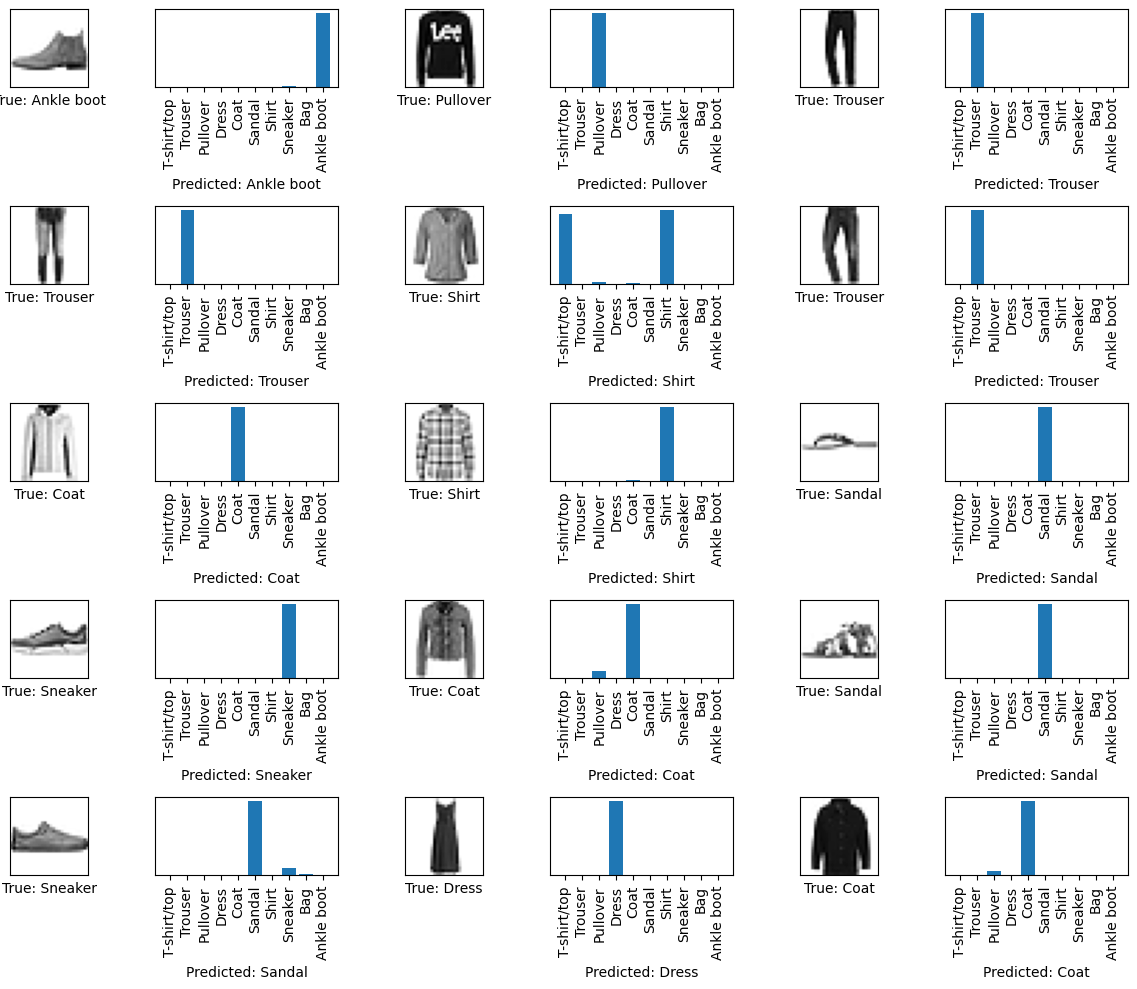

In [57]:
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predictions = model.predict(test_images)

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
  plt.xlabel(f"True: {class_names[test_labels[i]]}")
  plt.xticks([])
  plt.yticks([])

  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plt.bar(range(10), predictions[i])
  plt.xlabel(f"Predicted: {class_names[np.argmax(predictions[i])]}")
  plt.xticks(range(10), class_names, rotation=90)
  plt.yticks([])

plt.tight_layout()
plt.show()